<a href="https://colab.research.google.com/github/mapmatters/coursera-nlp/blob/main/nlp_class_1_Week3_nb03_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np                         # Linear algebra library
import matplotlib.pyplot as plt            # library for visualization
from sklearn.decomposition import PCA      # PCA library
import pandas as pd                        # Data frame library
import math                                # Library for math functions
import random                              # Library for pseudo random numbers
plt.style.use('ggplot')

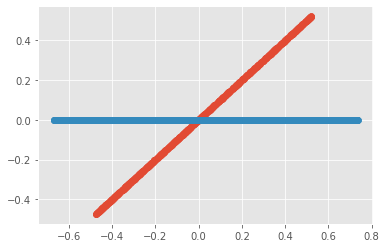

In [14]:
# y = n*x
n = 1
x = np.random.uniform(1, 2, 1000)
y = x.copy() * n

# PCA works better if the data is centered
x = x - np.mean(x)
y = y - np.mean(y)

data = pd.DataFrame({'x':x, 'y':y})
plt.scatter(data.x, data.y)

pca = PCA(n_components=2)

pcaTr = pca.fit(data)

rotatedData = pcaTr.transform(data)
dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1' , 'PC2'])

plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.show()

# Understanding the transformation model pcaTr

In [15]:
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Eigenvalues or explained variance
[1.74307153e-01 1.74644339e-34]


# Correlated Normal Random Variables

angle:  45.0
rotationMatrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


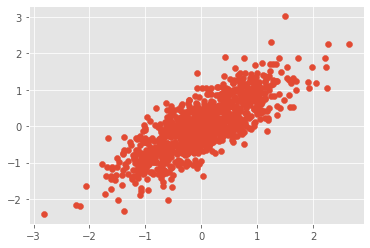

In [23]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

random.seed(100)

std1 = 1
std2 = 0.333

x = np.random.normal(0, std1, 1000)
y = np.random.normal(0, std2, 1000)

x = x - np.mean(x)
y = y - np.mean(y)

# define a pair of dependent variables with a desired amound of covariance
n = 1
angle = np.arctan(1/n)
print('angle: ', angle * 180 / math.pi)

rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],
                           [-np.sin(angle), np.cos(angle)]])

print('rotationMatrix')
print(rotationMatrix)

xy = np.concatenate(([x], [y]), axis=0).T

# transform the data using the rotation matrix
data = np.dot(xy, rotationMatrix)

# print the rotated data
plt.scatter(data[:,0], data[:,1])
plt.show()

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.69713281 -0.71694201]
 [-0.71694201  0.69713281]]

Eigenvalues or explained variance
[0.98803047 0.11102682]


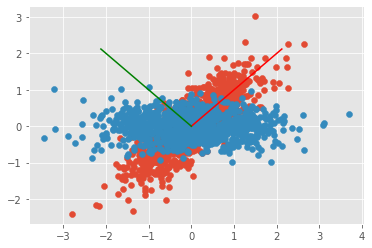

In [25]:
plt.scatter(data[:,0], data[:,1]) # Print the original data in blue

pca = PCA(n_components=2)

pcaTr = pca.fit(data)
dataPCA = pcaTr.transform(data)

print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

plt.scatter(dataPCA[:,0], dataPCA[:,1])

plt.plot([0, rotationMatrix[0][0]*std1*3], [0, rotationMatrix[0][1]*std1*3], 'k-', color='red')
plt.plot([0, rotationMatrix[1][0]*std1*3], [0, rotationMatrix[1][1]*std1*3], 'k-', color='green')

plt.show()

# PCA as a strategy for dimensionality reduction

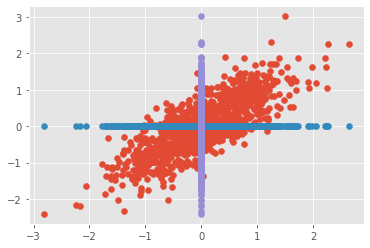

In [26]:
nPoints = len(data)

plt.scatter(data[:,0], data[:,1])

plt.scatter(data[:,0], np.zeros(nPoints))

plt.scatter(np.zeros(nPoints), data[:,1])

plt.show()

# PCA as a strategy to plot complex data